#  Covid-19 Prediction Model

------------------------------------------------

In [307]:
import altair as alt
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import requests

from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

In [308]:
res = requests.get('https://coronavirus-tracker-api.herokuapp.com/confirmed')
res.status_code

200

Used API from coronavirus-tracker-api.herokuapp.com using the get function to receive the data. And then converted it into json format.

In [309]:
resjson = res.json()
#resjson

In [310]:
resjson['locations']

[{'country': 'Afghanistan',
  'country_code': 'AF',
  'province': '',
  'coordinates': {'lat': '33.0', 'long': '65.0'},
  'history': {'1/22/20': 0,
   '1/23/20': 0,
   '1/24/20': 0,
   '1/25/20': 0,
   '1/26/20': 0,
   '1/27/20': 0,
   '1/28/20': 0,
   '1/29/20': 0,
   '1/30/20': 0,
   '1/31/20': 0,
   '2/1/20': 0,
   '2/2/20': 0,
   '2/3/20': 0,
   '2/4/20': 0,
   '2/5/20': 0,
   '2/6/20': 0,
   '2/7/20': 0,
   '2/8/20': 0,
   '2/9/20': 0,
   '2/10/20': 0,
   '2/11/20': 0,
   '2/12/20': 0,
   '2/13/20': 0,
   '2/14/20': 0,
   '2/15/20': 0,
   '2/16/20': 0,
   '2/17/20': 0,
   '2/18/20': 0,
   '2/19/20': 0,
   '2/20/20': 0,
   '2/21/20': 0,
   '2/22/20': 0,
   '2/23/20': 0,
   '2/24/20': 1,
   '2/25/20': 1,
   '2/26/20': 1,
   '2/27/20': 1,
   '2/28/20': 1,
   '2/29/20': 1,
   '3/1/20': 1,
   '3/2/20': 1,
   '3/3/20': 1,
   '3/4/20': 1,
   '3/5/20': 1,
   '3/6/20': 1,
   '3/7/20': 1,
   '3/8/20': 4,
   '3/9/20': 4,
   '3/10/20': 5,
   '3/11/20': 7,
   '3/12/20': 7,
   '3/13/20': 7,
   

Indexed through the nested dictionaries to find the key 'history' to extract the dictionary of all the dates and confirmed cases. 

Then defined a function so that we can reuse it for any other country.

In [311]:
def country(country):
    b = resjson['locations']
    for a in b:
            if a['country'] == country :
                print(a)
                name = a['country']
                latest = a['latest']
                history = a['history']
    return history


In [312]:
history = country('Nepal')

{'country': 'Nepal', 'country_code': 'NP', 'province': '', 'coordinates': {'lat': '28.1667', 'long': '84.25'}, 'history': {'1/22/20': 0, '1/23/20': 0, '1/24/20': 0, '1/25/20': 1, '1/26/20': 1, '1/27/20': 1, '1/28/20': 1, '1/29/20': 1, '1/30/20': 1, '1/31/20': 1, '2/1/20': 1, '2/2/20': 1, '2/3/20': 1, '2/4/20': 1, '2/5/20': 1, '2/6/20': 1, '2/7/20': 1, '2/8/20': 1, '2/9/20': 1, '2/10/20': 1, '2/11/20': 1, '2/12/20': 1, '2/13/20': 1, '2/14/20': 1, '2/15/20': 1, '2/16/20': 1, '2/17/20': 1, '2/18/20': 1, '2/19/20': 1, '2/20/20': 1, '2/21/20': 1, '2/22/20': 1, '2/23/20': 1, '2/24/20': 1, '2/25/20': 1, '2/26/20': 1, '2/27/20': 1, '2/28/20': 1, '2/29/20': 1, '3/1/20': 1, '3/2/20': 1, '3/3/20': 1, '3/4/20': 1, '3/5/20': 1, '3/6/20': 1, '3/7/20': 1, '3/8/20': 1, '3/9/20': 1, '3/10/20': 1, '3/11/20': 1, '3/12/20': 1, '3/13/20': 1, '3/14/20': 1, '3/15/20': 1, '3/16/20': 1, '3/17/20': 1, '3/18/20': 1, '3/19/20': 1, '3/20/20': 1, '3/21/20': 1, '3/22/20': 1, '3/23/20': 2, '3/24/20': 2, '3/25/20': 3,

In [313]:
print(history)

{'1/22/20': 0, '1/23/20': 0, '1/24/20': 0, '1/25/20': 1, '1/26/20': 1, '1/27/20': 1, '1/28/20': 1, '1/29/20': 1, '1/30/20': 1, '1/31/20': 1, '2/1/20': 1, '2/2/20': 1, '2/3/20': 1, '2/4/20': 1, '2/5/20': 1, '2/6/20': 1, '2/7/20': 1, '2/8/20': 1, '2/9/20': 1, '2/10/20': 1, '2/11/20': 1, '2/12/20': 1, '2/13/20': 1, '2/14/20': 1, '2/15/20': 1, '2/16/20': 1, '2/17/20': 1, '2/18/20': 1, '2/19/20': 1, '2/20/20': 1, '2/21/20': 1, '2/22/20': 1, '2/23/20': 1, '2/24/20': 1, '2/25/20': 1, '2/26/20': 1, '2/27/20': 1, '2/28/20': 1, '2/29/20': 1, '3/1/20': 1, '3/2/20': 1, '3/3/20': 1, '3/4/20': 1, '3/5/20': 1, '3/6/20': 1, '3/7/20': 1, '3/8/20': 1, '3/9/20': 1, '3/10/20': 1, '3/11/20': 1, '3/12/20': 1, '3/13/20': 1, '3/14/20': 1, '3/15/20': 1, '3/16/20': 1, '3/17/20': 1, '3/18/20': 1, '3/19/20': 1, '3/20/20': 1, '3/21/20': 1, '3/22/20': 1, '3/23/20': 2, '3/24/20': 2, '3/25/20': 3, '3/26/20': 3, '3/27/20': 4, '3/28/20': 5, '3/29/20': 5, '3/30/20': 5, '3/31/20': 5, '4/1/20': 5, '4/2/20': 6, '4/3/20': 6

In [314]:
wc = pd.DataFrame(list(history.items()), columns=['date','confirmed'])
wc.head()

,date,confirmed
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,1
4,1/26/20,1


Made a dataframe and then added a column by using map function.

The datetime module was used to convert the date intoappropriate timeseries format.

In [315]:
wc['days']= wc['date'].map(lambda x : (datetime.strptime(x, '%m/%d/%y') - datetime.strptime("1/22/20", '%m/%d/%y')).days  )
wc[['date','days','confirmed']]

,date,days,confirmed
0,1/22/20,0,0
1,1/23/20,1,0
2,1/24/20,2,0
3,1/25/20,3,1
4,1/26/20,4,1
...,...,...,...
122,5/23/20,122,584
123,5/24/20,123,603
124,5/25/20,124,682
125,5/26/20,125,772


### The Gompertz curve or Gompertz function

The Gompertz curve or Gompertz function, is a type of mathematical model for a time series and is named after Benjamin Gompertz (1779-1865). It is a sigmoid function which describes growth as being slowest at the start and end of a given time period. The right-hand or future value asymptote of the function is approached much more gradually by the curve than the left-hand or lower valued asymptote. This is in contrast to the simple logistic function in which both asymptotes are approached by the curve symmetrically. It is a special case of the generalised logistic function. The function was originally designed to describe human mortality, but since has been modified to be applied in biology, with regard to detailing populations. 

<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/3ea58f425f7a5bf837cf2889a8a718c5dfc3339f">

where,

    a is an asymptote, since
   

<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/e00a0d4b8a4a212e67d449e09e494a4840ebea1f">

    b sets the displacement along the x-axis (translates the graph to the left or right). Symmetry is when b =log(2).
    c sets the growth rate (y scaling)
    e is Euler's Number (e = 2.71828...)

In [316]:
def gompertz(a, c, t, t_0):
    Q = a * np.exp(-np.exp(-c*(t-t_0)))
    return Q

x = list(wc['days'])
y = list(wc['confirmed'])


x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.85, test_size=0.15, shuffle=False)

x_test_added = x_test + list(range((max(x_test)+1), 200))

popt, pcov = curve_fit(gompertz, x_train, y_train, method='trf', bounds=([5, 0, 0],[30*max(y_train),0.15, 245]))
a, estimated_c, estimated_t_0 = popt
y_pred = gompertz(a, estimated_c, x_train+x_test_added, estimated_t_0)

y_pred

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.82441804e-305,
       7.98280506e-283, 3.27657075e-262, 4.35753597e-243, 2.40570155e-225,
       6.93852878e-209, 1.29404379e-193, 1.90206055e-179, 2.64741348e-166,
       4.13722069e-154, 8.50174047e-143, 2.66001185e-132, 1.45177743e-122,
       1.56802739e-113, 3.76774399e-105, 2.24515825e-097, 3.66949392e-090,
       1.80614744e-083, 2

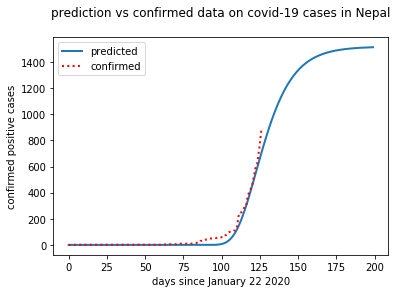

In [317]:
plt.plot(x_train+x_test_added, y_pred, linewidth=2, label='predicted') 
plt.plot(x, y, linewidth=2, color='r', linestyle='dotted', label='confirmed')
plt.title('prediction vs confirmed data on covid-19 cases in Nepal\n')
plt.xlabel('days since January 22 2020')
plt.ylabel('confirmed positive cases')
plt.legend(loc='upper left') 

#### After fitting a curve, we see a projection of confirmed cases for 200 days since late January. We can obsereve how the trend changes over time and we can note that the we are approaching the peak of the curve and curve is expected to flatten within the next 50 days. The maximum cases is projected to be aprroximately 1500. 

-----------------------------------------------------------------------------------------------------------------

##### After this we similarly train a model to predict the covid cases fot US.

In [318]:
US = country("US")

{'country': 'US', 'country_code': 'US', 'province': '', 'coordinates': {'lat': '37.0902', 'long': '-95.7129'}, 'history': {'1/22/20': 1, '1/23/20': 1, '1/24/20': 2, '1/25/20': 2, '1/26/20': 5, '1/27/20': 5, '1/28/20': 5, '1/29/20': 5, '1/30/20': 5, '1/31/20': 7, '2/1/20': 8, '2/2/20': 8, '2/3/20': 11, '2/4/20': 11, '2/5/20': 11, '2/6/20': 11, '2/7/20': 11, '2/8/20': 11, '2/9/20': 11, '2/10/20': 11, '2/11/20': 12, '2/12/20': 12, '2/13/20': 13, '2/14/20': 13, '2/15/20': 13, '2/16/20': 13, '2/17/20': 13, '2/18/20': 13, '2/19/20': 13, '2/20/20': 13, '2/21/20': 15, '2/22/20': 15, '2/23/20': 15, '2/24/20': 51, '2/25/20': 51, '2/26/20': 57, '2/27/20': 58, '2/28/20': 60, '2/29/20': 68, '3/1/20': 74, '3/2/20': 98, '3/3/20': 118, '3/4/20': 149, '3/5/20': 219, '3/6/20': 267, '3/7/20': 403, '3/8/20': 519, '3/9/20': 588, '3/10/20': 962, '3/11/20': 1285, '3/12/20': 1667, '3/13/20': 2181, '3/14/20': 2729, '3/15/20': 3536, '3/16/20': 4661, '3/17/20': 6437, '3/18/20': 7781, '3/19/20': 13748, '3/20/20':

In [319]:
us = pd.DataFrame(list(US.items()), columns=['date','confirmed'])


In [320]:
us['days']= us['date'].map(lambda x : (datetime.strptime(x, '%m/%d/%y') - datetime.strptime("1/22/20", '%m/%d/%y')).days  )
us[['date','days','confirmed']]

,date,days,confirmed
0,1/22/20,0,1
1,1/23/20,1,1
2,1/24/20,2,2
3,1/25/20,3,2
4,1/26/20,4,5
...,...,...,...
122,5/23/20,122,1622612
123,5/24/20,123,1643246
124,5/25/20,124,1662302
125,5/26/20,125,1680913


In [321]:
x = list(us['days'])
y = list(us['confirmed'])


x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.85, test_size=0.15, shuffle=False)

x_test_added = x_test + list(range((max(x_test)+1), 225))

popt, pcov = curve_fit(gompertz, x_train, y_train, method='trf', bounds=([1500000, 0, 0],[2*max(y_train),0.1, 175]))
a, estimated_c, estimated_t_0 = popt
y_pred = gompertz(a, estimated_c, x_train+x_test_added, estimated_t_0)

y_pred

array([6.34261556e-29, 3.05398635e-27, 1.21731925e-25, 4.05399077e-24,
       1.13791253e-22, 2.71458962e-21, 5.54770517e-20, 9.78617889e-19,
       1.50079169e-17, 2.01465208e-16, 2.38271642e-15, 2.49815891e-14,
       2.33558170e-13, 1.95805466e-12, 1.47985225e-11, 1.01337957e-10,
       6.31793998e-10, 3.60259820e-09, 1.88705100e-08, 9.11753042e-08,
       4.07950214e-07, 1.69668272e-06, 6.58272086e-06, 2.39052832e-05,
       8.15204393e-05, 2.61851763e-04, 7.94562568e-04, 2.28396657e-03,
       6.23572666e-03, 1.62110372e-02, 4.02252233e-02, 9.54854023e-02,
       2.17302713e-01, 4.75090085e-01, 9.99813265e-01, 2.02909301e+00,
       3.97826554e+00, 7.54788826e+00, 1.38800974e+01, 2.47774426e+01,
       4.29978408e+01, 7.26376224e+01, 1.19610912e+02, 1.92227638e+02,
       3.01864417e+02, 4.63712895e+02, 6.97579600e+02, 1.02870102e+03,
       1.48852866e+03, 2.11543220e+03, 2.95526607e+03, 4.06174543e+03,
       5.49658325e+03, 7.32934959e+03, 9.63702701e+03, 1.25032520e+04,
      

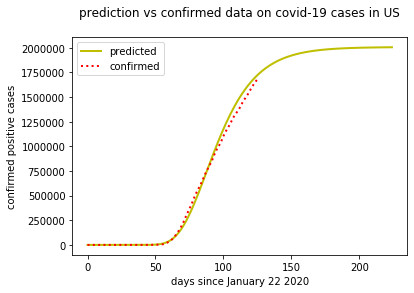

In [322]:
plt.plot(x_train+x_test_added, y_pred, linewidth=2, label='predicted', color = 'y', ) 
plt.plot(x, y, linewidth=2, color='r', linestyle='dotted', label='confirmed')
plt.title('prediction vs confirmed data on covid-19 cases in US\n')
plt.xlabel('days since January 22 2020')
plt.ylabel('confirmed positive cases')
plt.legend(loc='upper left') 

#### We trained a model to predict the covid cases fot US andplotted the curve. We can see that the predicted number of cases is approximately 2 million, 250000 additional cases than the current cases.  
#### We can obsereve how the trend changes over time and we can note that the curve is flattening and is expected to completely flatten within the next 100 days. 

----------------------------------------------------------------

### Disscussion:

We were able to create a model for the prediction of Covid-19 cases using Gompertz function and also observe how the trend is changing and is expected to change over time, how and when the curve is flattening. Although the prediction is approximate and there probably is many complex variable involved, but it does give us a idea of trend that is very close to accurate.

Going furthur we can easily create a prediction model for any other country. We can simply enter the country's name in the function : country("country's name") to extract the data we need for that country.

I plan to continue improving by adding a logistic function in addition to Gompertz function and comparing them side by side.

----------------------------------------------------------------------------------------------